In [1]:
# import Python libraries
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import sympy as sym
from sympy.plotting import plot
import pandas as pd
from IPython.display import display
from IPython.core.display import Math

1. Find the extrema in the function $f(x)=x^3-7.5x^2+18x-10$ analytically and determine if they are minimum or maximum.

In [2]:
x = sym.symbols('x')
f = x**3 - 7.5*x**2 + 18*x - 10
display(Math(sym.latex('f(x) = ') + sym.latex(f)))

fdiff = sym.expand(sym.diff(f, x))
display(Math(sym.latex('\dot f(x) = ') + sym.latex(fdiff)))

roots = sym.solve(fdiff, x)
display(Math(sym.latex('Roots:') + sym.latex(roots)))

fdiff2 = sym.expand(sym.diff(fdiff, x))
display(Math(sym.latex('\ddot f(x) = ') + sym.latex(fdiff2)))

f2 = fdiff2.subs(x,2)
display(Math(sym.latex('\ddot f(2) = ') + sym.latex(f2)))

f3 = fdiff2.subs(x,3)
display(Math(sym.latex('\ddot f(3) = ') + sym.latex(f3)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

f(2) is a maximum and f(3) is a minimum

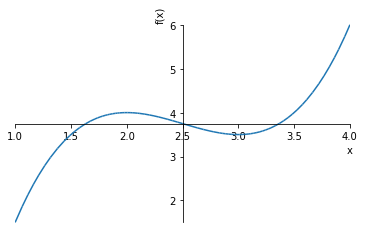

In [6]:
plot(f,(x,1,4),xlabel= 'x',ylabel = 'f(x)')

2. Find the minimum in the $f(x)=x^3-7.5x^2+18x-10$ using the gradient descent algorithm.  

In [17]:
cur_x = 2.001             
gamma = 0.01            # step size multiplier
precision = 0.00001
step_size = 1           # initial step size
max_iters = 10000       # maximum number of iterations
iters = 0               # iteration counter


f  = lambda x: x**3 - 7.5*x**2 + 18*x - 10  # lambda function for f(x)
df = lambda x: 3*x**2 - 15*x + 18   # lambda function for the gradient of f(x)

while (step_size > precision) & (iters < max_iters):
    prev_x = cur_x
    cur_x -= gamma*df(prev_x)
    step_size = abs(cur_x - prev_x)
    iters+=1

print('True local minimum at {} with function value {}.'.format(3, f(3)))
print('Local minimum by gradient descent at {} with function value {}.'.format(cur_x, f(cur_x)))

True local minimum at 3 with function value 3.5.
Local minimum by gradient descent at 2.9996813387653187 with function value 3.500000152285125.


3. Regarding the distribution problem for the elbow muscles presented in this text:  
    a. Test different initial values for the optimization.  
    b. Test other values for the elbow angle where the results are likely to change.   

In [41]:
from scipy.optimize import minimize

In [48]:
def cf_f1(x):
    """Cost function: sum of forces."""  
    return x[0] + x[1] + x[2]

def cf_f2(x):
    """Cost function: sum of forces squared."""
    return x[0]**2 + x[1]**2 + x[2]**2

def cf_fpcsa2(x, a):
    """Cost function: sum of squared muscle stresses."""
    return (x[0]/a[0])**2 + (x[1]/a[1])**2 + (x[2]/a[2])**2

def cf_fmmax3(x, m):
    """Cost function: sum of cubic forces normalized by moments."""
    return (x[0]/m[0])**3 + (x[1]/m[1])**3 + (x[2]/m[2])**3
def cf_f1d(x):
    """Derivative of cost function: sum of forces."""
    dfdx0 = 1
    dfdx1 = 1
    dfdx2 = 1
    return np.array([dfdx0, dfdx1, dfdx2])

def cf_f2d(x):
    """Derivative of cost function: sum of forces squared."""
    dfdx0 = 2*x[0]
    dfdx1 = 2*x[1]
    dfdx2 = 2*x[2]
    return np.array([dfdx0, dfdx1, dfdx2])

def cf_fpcsa2d(x, a):
    """Derivative of cost function: sum of squared muscle stresses."""
    dfdx0 = 2*x[0]/a[0]**2
    dfdx1 = 2*x[1]/a[1]**2
    dfdx2 = 2*x[2]/a[2]**2
    return np.array([dfdx0, dfdx1, dfdx2])

def cf_fmmax3d(x, m):
    """Derivative of cost function: sum of cubic forces normalized by moments."""
    dfdx0 = 3*x[0]**2/m[0]**3
    dfdx1 = 3*x[1]**2/m[1]**3
    dfdx2 = 3*x[2]**2/m[2]**3
    return np.array([dfdx0, dfdx1, dfdx2])

In [49]:
# time elbow_flexion BIClong BICshort BRA
r_ef = np.loadtxt('./../../../data/r_elbowflexors.mot', skiprows=7)
f_ef = np.loadtxt('./../../../data/f_elbowflexors.mot', skiprows=7)

m_ef = r_ef*1
m_ef[:, 2:] = r_ef[:, 2:]*f_ef[:, 2:]

a_ef = np.array([624.3, 435.56, 987.26])/50  # 50 N/cm2

In [66]:
M = 20  # desired torque at the elbow
iang = 35  # which will give the closest value to 90 degrees


r  = r_ef[iang, 2:]
f0 = f_ef[iang, 2:]
a  = a_ef
m  = m_ef[iang, 2:]
x0 = f_ef[iang, 2:]*10  # far from the correct answer for the sum of torques
print('M =', M)
print('x0 =', x0)
print('r * x0 =', np.sum(r*x0))

bnds = ((0, f0[0]), (0, f0[1]), (0, f0[2]))


M = 20
x0 = [6243.6530836 4331.0512698 9816.5091208]
r * x0 = 489.76408068035386


In [67]:
# use this in combination with the parameter bounds:
cons = ({'type': 'eq',
         'fun' : lambda x, r, f0, M: np.array([r[0]*x[0] + r[1]*x[1] + r[2]*x[2] - M]), 
         'jac' : lambda x, r, f0, M: np.array([r[0], r[1], r[2]]), 'args': (r, f0, M)})

In [68]:
# to enter everything as constraints:
cons = ({'type': 'eq',
         'fun' : lambda x, r, f0, M: np.array([r[0]*x[0] + r[1]*x[1] + r[2]*x[2] - M]), 
         'jac' : lambda x, r, f0, M: np.array([r[0], r[1], r[2]]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: f0[0]-x[0],
         'jac' : lambda x, r, f0, M: np.array([-1, 0, 0]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: f0[1]-x[1],
         'jac' : lambda x, r, f0, M: np.array([0, -1, 0]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: f0[2]-x[2],
         'jac' : lambda x, r, f0, M: np.array([0, 0, -1]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: x[0],
         'jac' : lambda x, r, f0, M: np.array([1, 0, 0]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: x[1],
         'jac' : lambda x, r, f0, M: np.array([0, 1, 0]), 'args': (r, f0, M)},
        {'type': 'ineq', 'fun' : lambda x, r, f0, M: x[2],
         'jac' : lambda x, r, f0, M: np.array([0, 0, 1]), 'args': (r, f0, M)})

In [69]:
f1r = minimize(fun=cf_f1, x0=x0, args=(), jac=cf_f1d,
               constraints=cons, method='SLSQP',
               options={'disp': True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 579.9580980275041
            Iterations: 8
            Function evaluations: 8
            Gradient evaluations: 8


In [70]:
f2r = minimize(fun=cf_f2, x0=x0, args=(), jac=cf_f2d,
               constraints=cons, method='SLSQP',
               options={'disp': True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 157427.53751905984
            Iterations: 5
            Function evaluations: 6
            Gradient evaluations: 5


In [71]:
fpcsa2r = minimize(fun=cf_fpcsa2, x0=x0, args=(a,), jac=cf_fpcsa2d,
                   constraints=cons, method='SLSQP',
                   options={'disp': True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1180.0919972395043
            Iterations: 10
            Function evaluations: 10
            Gradient evaluations: 10


In [72]:
fmmax3r = minimize(fun=cf_fmmax3, x0=x0, args=(m,), jac=cf_fmmax3d,
                   constraints=cons, method='SLSQP',
                   options={'disp': True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6947.006456362233
            Iterations: 14
            Function evaluations: 15
            Gradient evaluations: 14


In [73]:
dat = np.vstack((np.around(r*100,1), np.around(a,1), np.around(f0,0), np.around(m,1)))
opt = np.around(np.vstack((f1r.x, f2r.x, fpcsa2r.x, fmmax3r.x)), 1)
er = ['-', '-', '-', '-',
      np.sum(r*f1r.x)-M, np.sum(r*f2r.x)-M, np.sum(r*fpcsa2r.x)-M, np.sum(r*fmmax3r.x)-M]
data = np.vstack((np.vstack((dat, opt)).T, er)).T

rows = ['$\text{Moment arm}\;[cm]$', '$pcsa\;[cm^2]$', '$F_{max}\;[N]$', '$M_{max}\;[Nm]$',
        '$\sum F_i$', '$\sum F_i^2$', '$\sum(F_i/pcsa_i)^2$', '$\sum(F_i/M_{max,i})^3$']
cols = ['Biceps long head', 'Biceps short head', 'Brachialis', 'Error in M']
df = pd.DataFrame(data, index=rows, columns=cols)
print('\nComparison of different cost functions for solving the distribution problem')
df


Comparison of different cost functions for solving the distribution problem


,Biceps long head,Biceps short head,Brachialis,Error in M
$\text{Moment arm}\;[cm]$,3.4,3.4,1.3,-
$pcsa\;[cm^2]$,12.5,8.7,19.7,-
$F_{max}\;[N]$,624.0,433.0,982.0,-
$M_{max}\;[Nm]$,21.5,14.9,12.5,-
$\sum F_i$,363.7,216.3,0.0,-3.552713678800501e-15
$\sum F_i^2$,271.4,271.4,100.3,0.0
$\sum(F_i/pcsa_i)^2$,317.2,154.4,293.1,0.0
"$\sum(F_i/M_{max,i})^3$",345.8,199.8,93.1,-3.552713678800501e-15
